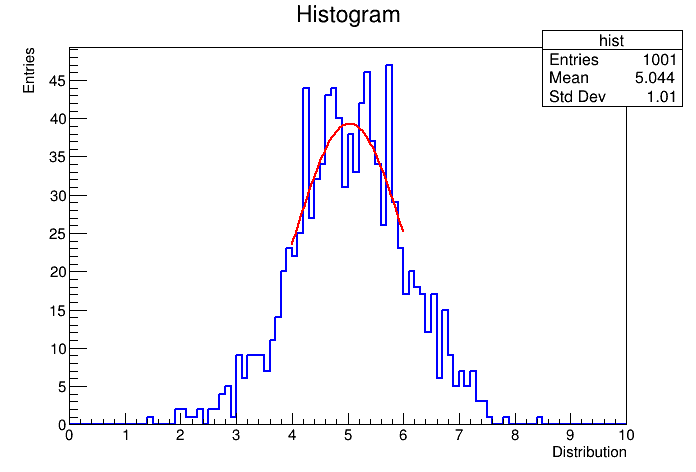

 FCN=21.1846 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=3.47767e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.93134e+01   2.11799e+00  -1.27078e-03   8.92048e-05
   2  Mean         5.03632e+00   4.65664e-02   5.62497e-05  -2.61390e-02
   3  Sigma        1.01657e+00   1.35864e-01   1.26650e-04   1.24206e-02
4.95424


In [1]:
TH1F *hist = new TH1F("hist","Histogram",100,0,10);

TRandom2 *randomGen = new TRandom2(3); //This is to generate a random number

fstream file;

file.open("data.txt", ios::out); //ios::out is used to read data out to a file

for(int i = 0; i < 1000; i++){
    double r = randomGen->Gaus(5,1); // Gaus(mean, standard deviation)
    file << r << endl;
}

file.close();

//We use fstream to read from a file

file.open("data.txt",ios::in); //the name of the file and ios::in refers to reading

double value;

while(1){
    file >> value; //these corresspond to the values that we are reading
    hist->Fill(value);
    if(file.eof()){
        break;
    }
}

file.close();

hist->GetXaxis()->SetTitle("Distribution");
hist->GetYaxis()->SetTitle("Entries");
hist->SetMarkerStyle(1);
hist->SetLineColor(kBlue);
hist->SetLineWidth(2);
hist->SetMarkerSize(1);
//hist->GetXaxis()->SetRangeUser(0,10);

TF1 *fit = new TF1("fit", "gaus", 4, 6); //This is used to make the fits in the graph (Name, function, start point, end point)

TCanvas *c1 = new TCanvas();
    

hist->Draw();

//We can do the following to customize the gaussian fit
fit->SetParameter(0,42); //Amplitude of gaussian
fit->SetParameter(1,5);//mean
fit->SetParameter(2,1);//std deviation


hist->Fit("fit", "R"); //The "R" is used when we have a limited range for the fit

c1->Draw();

double mean = fit->GetParameter(1);
double sigma = fit->GetParameter(2);

cout<< mean/sigma << endl;
